In [46]:
# 1. Gestion de las Librerias
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statistics as st
import scipy.stats as st

In [6]:
# 2. Carga del dataset
dataset = pd.read_excel('ejemploCalificacionesExcel.xlsx', index_col=0)
dataset

,NOMBRES,APELLIDOS,Programa,Genero,Matematicas,Español,Ciencias,Idiomas
ITEM,,,,,,,,
1,Juan,García,Contabilidad,M,1.66,2.19,3.56,2.58
2,María,Pérez,Mercadeo,Femenino,3.21,2.54,1.98,3.76
3,Pedro,Fernández,Sistemas,Masculino,3.10,3.11,2.62,2.42
4,Ana,Sánchez,Administracion,F,NaN,2.50,3.66,1.93
5,Luis,González,Salud,Masculino,2.91,2.59,2.45,NaN
6,Lucía,Martínez,Salud,NaN,3.95,1.88,2.67,1.69
7,Diego,López,Administracion,Masculino,4.20,1.69,2.36,3.24
8,Fernanda,Torres,Sistemas,Femenino,4.08,1.68,4.16,2.94
9,Miguel,Flores,Mercadeo,Masculino,4.06,3.64,NaN,3.28


In [7]:
# 3. Describir el conjunto de datos
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20 entries, 1 to 20
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   NOMBRES      20 non-null     object 
 1   APELLIDOS    20 non-null     object 
 2   Programa     20 non-null     object 
 3   Genero       18 non-null     object 
 4   Matematicas  18 non-null     float64
 5   Español      20 non-null     float64
 6   Ciencias     19 non-null     float64
 7   Idiomas      18 non-null     float64
dtypes: float64(4), object(4)
memory usage: 1.4+ KB


In [8]:
# 3. Describir el conjunto de datos
dataset.describe()

,Matematicas,Español,Ciencias,Idiomas
count,18.00000,20.000000,19.000000,18.000000
mean,3.18500,2.919500,2.978947,2.764444
std,0.88603,0.943825,0.870229,0.638650
min,1.66000,1.680000,1.840000,1.690000
25%,2.55000,2.120000,2.260000,2.292500
50%,3.24000,2.850000,2.670000,2.760000
75%,4.05750,3.667500,3.700000,3.222500
max,4.20000,5.000000,4.310000,4.000000


In [9]:
# 4. Ejemplo de Agrupacion
# NOTA: Cantidad de estudiantes por genero en cada programa

est_prog_count = dataset.groupby(['Genero', 'Programa']).agg({'Genero':['count']})
est_prog_count

Genero
                          count
Genero    Programa             
F         Administracion      1
Femenino  Administracion      1
          Contabilidad        2
          Mercadeo            2
          Sistemas            2
M         Contabilidad        1
          Salud               1
Masculino Administracion      1
          Contabilidad        1
          Mercadeo            1
          Salud               1
          Sistemas            3
Mujer     Sistemas            1

In [10]:
# 4. Ejemplo de Agrupacion
# NOTA: Cantidad de estudiante que aprobaron cada Asignatura

approved_students = dataset[(dataset['Matematicas'] >= 3.0) |
                            (dataset['Español'] >= 3.0) |
                            (dataset['Ciencias'] >= 3.0) |
                            (dataset['Idiomas'] >= 3.0)]


approved_counts = {}
for subject in ['Matematicas', 'Español', 'Ciencias', 'Idiomas']:
    approved_counts[subject] = (dataset[subject] >= 3.0).sum()

approved_counts

{'Matematicas': np.int64(11),
 'Español': np.int64(10),
 'Ciencias': np.int64(9),
 'Idiomas': np.int64(7)}

In [11]:
approved_students = dataset[['Matematicas', 'Español', 'Ciencias', 'Idiomas']] >= 3.0
approved_students = approved_students.sum()
approved_students

,0
Matematicas,11
Español,10
Ciencias,9
Idiomas,7


<Axes: ylabel='Genero,Programa'>

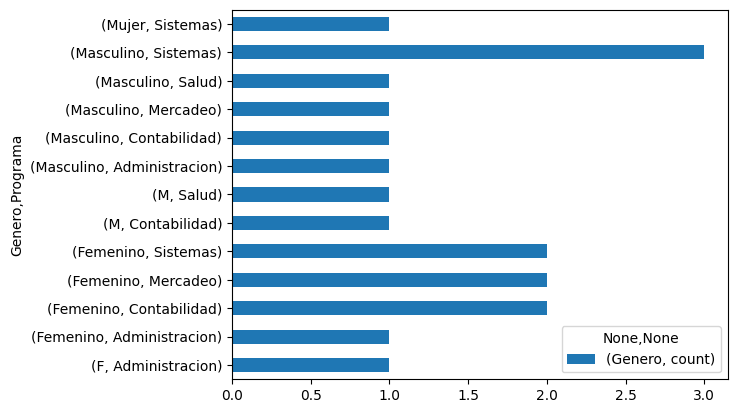

In [12]:
# 5. Graficaciones
# NOTA: Cantidad de estudiantes por genero en cada programa

est_prog_count.plot(kind='barh')

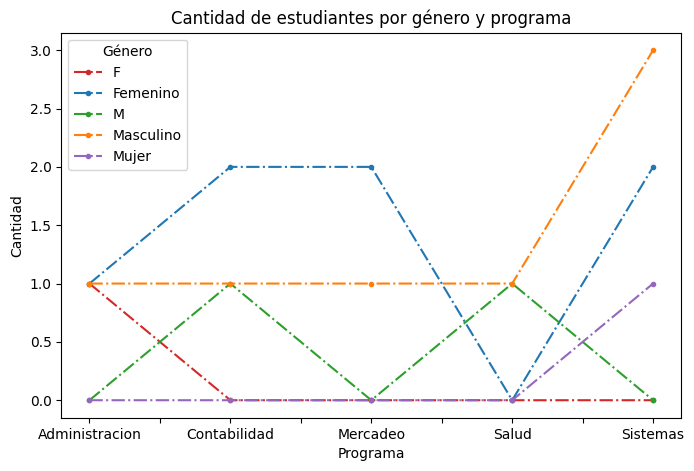

In [34]:
# 5. Graficaciones Matplotlib
# NOTA: Cantidad de estudiantes por genero en cada programa

bar_colors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange', 'tab:purple']

# Agrupar por programa y género
graf_est_gen_prog = dataset.groupby(['Programa', 'Genero']).size().unstack(fill_value=0)

# Graficar directamente desde pandas (una línea por género)
graf_est_gen_prog.plot(
    kind='line',
    color=bar_colors,
    marker='.',
    linestyle='-.',
    figsize=(8,5),
    title='Cantidad de estudiantes por género y programa'
)

# Personalizar etiquetas
plt.xlabel('Programa')
plt.ylabel('Cantidad')
plt.legend(title='Género')
plt.show()


In [14]:
# 6.Cantidad de valores nulo
dataset.isnull().sum()

,0
NOMBRES,0
APELLIDOS,0
Programa,0
Genero,2
Matematicas,2
Español,0
Ciencias,1
Idiomas,2


In [19]:
# 7. Tabla de frecuencia de la columna Genero, relativa y acumulada

# Generar las frecuencias
tabla_frecuencia = pd.DataFrame({
    'Frecuencia Absoluta': dataset['Genero'].value_counts(),
    'Frecuencia Absoluta Acumulada': dataset['Genero'].value_counts().cumsum(),
    'Frecuencia Relativa': dataset['Genero'].value_counts(normalize=True),
    'Frecuencia Relativa Acumulada': dataset['Genero'].value_counts(normalize=True).cumsum()
})

# Mostrar la tabla de frecuencia
tabla_frecuencia

,Frecuencia Absoluta,Frecuencia Absoluta Acumulada,Frecuencia Relativa,Frecuencia Relativa Acumulada
Genero,,,,
Femenino,7,7,0.388889,0.388889
Masculino,7,14,0.388889,0.777778
M,2,16,0.111111,0.888889
F,1,17,0.055556,0.944444
Mujer,1,18,0.055556,1.000000


In [35]:
# 7. Tabla de frecuencia de la columna Matematicas por intervalos

# Crear los intervalos
num_intervalos = int(1 + 3.322 * np.log10(len(dataset)))

tabla_frecuencia_mat = pd.DataFrame({
    'Frecuencia Absoluta': pd.cut(dataset['Matematicas'], bins=num_intervalos).value_counts().sort_index(),
    'Frecuencia Absoluta Acumulada': pd.cut(dataset['Matematicas'], bins=num_intervalos).value_counts().sort_index().cumsum(),
    'Frecuencia Relativa': pd.cut(dataset['Matematicas'], bins=num_intervalos).value_counts(normalize=True).sort_index(),
    'Frecuencia Relativa Acumulada': pd.cut(dataset['Matematicas'], bins=num_intervalos).value_counts(normalize=True).sort_index().cumsum()
})

tabla_frecuencia_mat

,Frecuencia Absoluta,Frecuencia Absoluta Acumulada,Frecuencia Relativa,Frecuencia Relativa Acumulada
Matematicas,,,,
"(1.657, 2.168]",3,3,0.166667,0.166667
"(2.168, 2.676]",3,6,0.166667,0.333333
"(2.676, 3.184]",2,8,0.111111,0.444444
"(3.184, 3.692]",3,11,0.166667,0.611111
"(3.692, 4.2]",7,18,0.388889,1.000000


In [27]:
# 8. Medidas de Tendencia

# Media
media = st.mean(dataset['Idiomas'])
print("Media:", media)

# Mediana
mediana = st.median(dataset['Idiomas'])
print("Mediana:", mediana)

# Moda
moda = st.mode(dataset['Idiomas'])
print("Moda:", moda)

Media: nan
Mediana: 3.2249999999999996
Moda: 2.94


In [44]:
columns = ['Matematicas', 'Español', 'Ciencias', 'Idiomas']
for col in columns:
  print(col)
  print("Media:", st.mean(dataset[col]))
  print("Mediana:", st.median(dataset[col]))
  print("Moda:", st.mode(dataset[col]))
  print()


columns_mode = ['Programa', 'Genero']
for col in columns_mode:
  print(col)
  print("Moda:", st.mode(dataset[col]))
  print()

Matematicas
Media: nan
Mediana: 2.91
Moda: 4.08

Español
Media: 2.9195
Mediana: 2.8499999999999996
Moda: 1.68

Ciencias
Media: nan
Mediana: 3.035
Moda: 3.7

Idiomas
Media: nan
Mediana: 3.2249999999999996
Moda: 2.94

Programa
Moda: Sistemas

Genero
Moda: Femenino



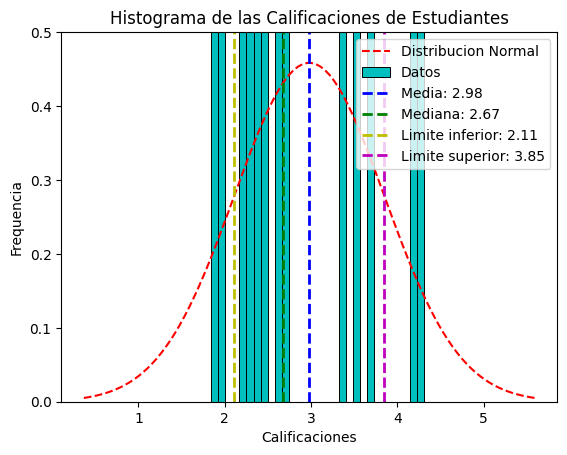

In [53]:
g1 = dataset['Ciencias']

mu, sigma = g1.mean(), g1.std()
median = g1.median()

# Calcular los límites superior e inferior de la desviación estándar
lower_limit, upper_limit = mu - sigma, mu + sigma

# Crear una distribución normal con la media y la desviación estándar de g1
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
y = st.norm.pdf(x, mu, sigma)

# Crear el gráfico
plt.plot(x, y, 'r--', label="Distribucion Normal ")
plt.hist(g1, 30, color='c', histtype='bar', cumulative=False, edgecolor='black', linewidth=0.7, density=True, label="Datos")

# Agregar la media y la mediana
plt.axvline(mu, color='b', linestyle='dashed', linewidth=2, label=f'Media: {mu:.2f}')
plt.axvline(median, color='g', linestyle='dashed', linewidth=2, label=f'Mediana: {median:.2f}')

# Agregar los límites de la desviación estándar
plt.axvline(lower_limit, color='y', linestyle='dashed', linewidth=2, label=f'Limite inferior: {lower_limit:.2f}')
plt.axvline(upper_limit, color='m', linestyle='dashed', linewidth=2, label=f'Limite superior: {upper_limit:.2f}')

plt.ylim(0, 0.5)
plt.ylabel('Frequencia')
plt.xlabel('Calificaciones')
plt.title('Histograma de las Calificaciones de Estudiantes')
plt.legend(loc="upper right")
plt.show()

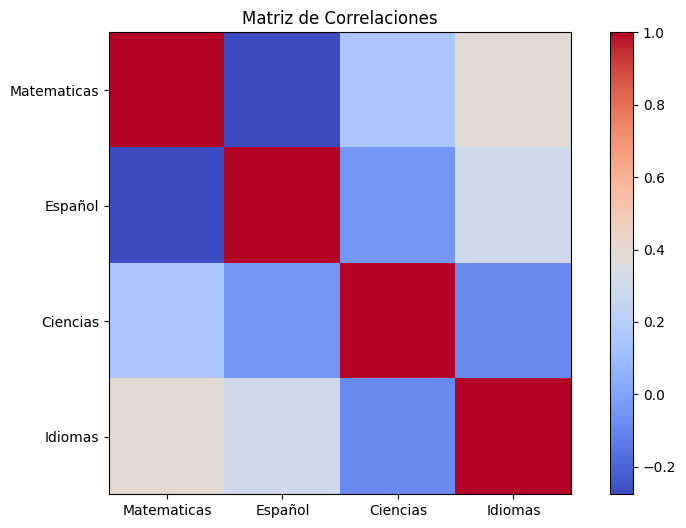

In [55]:
# Grafica de correlaciones
corr_matrix = dataset[['Matematicas', 'Español', 'Ciencias', 'Idiomas']].corr()
plt.figure(figsize=(10, 6))
plt.imshow(corr_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.title('Matriz de Correlaciones')
plt.show()

Descripción de los encontrado.